In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from astropy.table import Table
from matplotlib import pyplot as plt

In [2]:
data = Table.read('/Users/ioanaciuca/Desktop/SD_pred_highquality.fits')

In [3]:
data_disk_not_halo = ((data['M_H_1'] > -1.0) & (data['ALPHA_M_1'] > 0.12))
data= data[data_disk_not_halo]

In [4]:
len(data)

5477

In [5]:
mask1 = ((data['Rc_2'] > 5) & (data['Rc_2'] < 7))
mask2 = ((data['Rc_2'] >=7) & (data['Rc_2'] < 9))
mask3 = ((data['Rc_2'] >= 9) & (data['Rc_2'] < 11))
mask4 = (data['Rc_2'] >= 11)

dat_r5_7 = data[mask1]
dat_r7_9 = data[mask2]
dat_r9_11 = data[mask3]
dat_r11_outer = data[mask4]

/Users/ioanaciuca/anaconda3/envs/moreDL/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/Users/ioanaciuca/anaconda3/envs/moreDL/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)
/Users/ioanaciuca/anaconda3/envs/moreDL/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater_equal
  return getattr(self.data, op)(other)


In [7]:
print(len(dat_r5_7))
print(len(dat_r7_9))
print(len(dat_r9_11))
print(len(dat_r11_outer))

2495
1416
201
10


In [8]:
mh1 = dat_r5_7['M_H_1']
alpha1 = dat_r5_7['ALPHA_M_1']
logAge1 = dat_r5_7['pred_logAge']

mh2 = dat_r7_9['M_H_1']
alpha2 = dat_r7_9['ALPHA_M_1']
logAge2 = dat_r7_9['pred_logAge']

mh3 = dat_r9_11['M_H_1']
alpha3 = dat_r9_11['ALPHA_M_1']
logAge3 = dat_r9_11['pred_logAge']

mh4 = dat_r11_outer['M_H_1']
alpha4 = dat_r11_outer['ALPHA_M_1']
logAge4 = dat_r11_outer['pred_logAge']

vz_1 = dat_r5_7['vz_2']
vz_2 = dat_r7_9['vz_2']
vz_3 = dat_r9_11['vz_2']
vz_4 = dat_r11_outer['vz_2']

vphi_1 = dat_r5_7['vphi_2']
vphi_2 = dat_r7_9['vphi_2']
vphi_3 = dat_r9_11['vphi_2']
vphi_4 = dat_r11_outer['vphi_2']

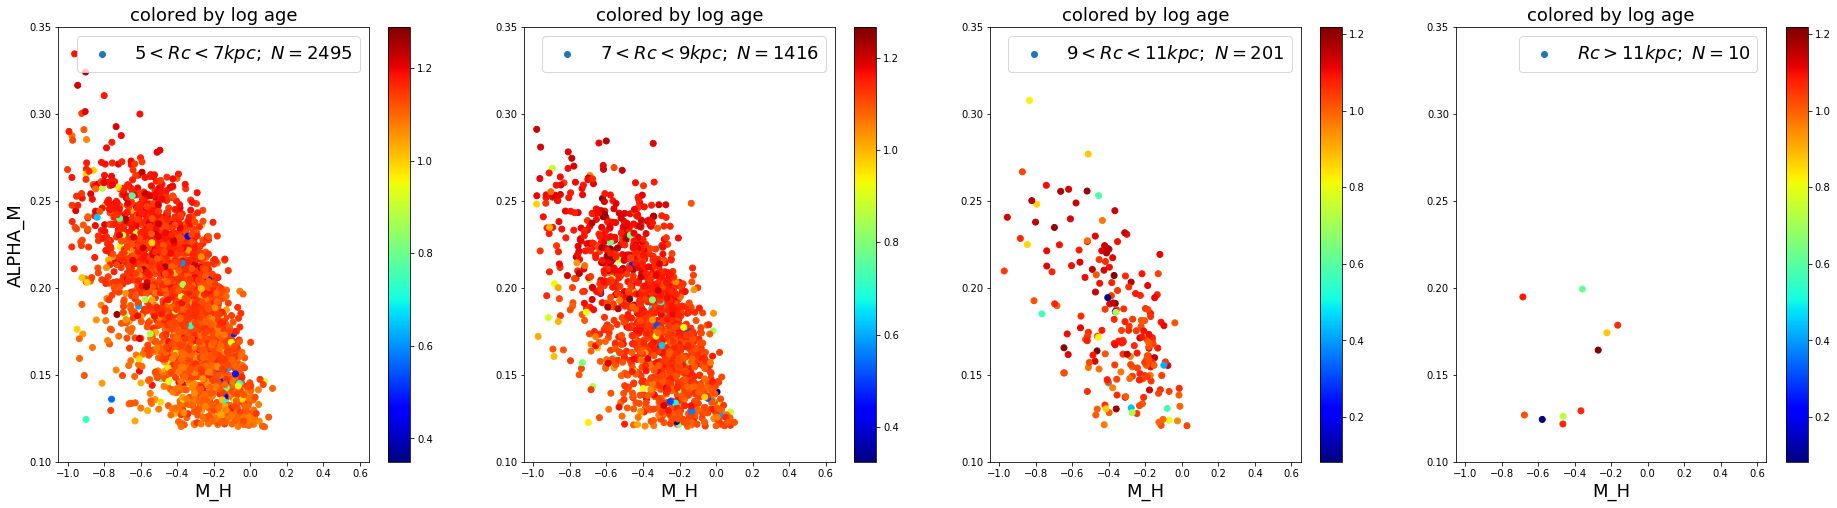

In [25]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (32, 8))

im1 = ax1.scatter(mh1, alpha1, c=logAge1,cmap='jet', label=r'$5 < Rc < 7 kpc; \ N=2495$')
im2 = ax2.scatter(mh2, alpha2,c=logAge2, cmap='jet', label=r'$7 < Rc < 9 kpc; \ N=1416$')
im3 = ax3.scatter(mh3, alpha3,c=logAge3, cmap='jet', label=r'$9 < Rc < 11 kpc; \ N=201$')
im3 = ax4.scatter(mh4, alpha4,c=logAge4, cmap='jet', label=r'$Rc > 11 kpc; \ N=10$')

ax1.legend(fontsize=18)
ax2.legend(fontsize=18)
ax3.legend(fontsize=18)
ax4.legend(fontsize=18)

ax1.set_xlabel('M_H', fontsize=18)
ax2.set_xlabel('M_H', fontsize=18)
ax3.set_xlabel('M_H', fontsize=18)
ax4.set_xlabel('M_H', fontsize=18)

fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
fig.colorbar(im3, ax=ax3)
fig.colorbar(im3, ax=ax4)

ax1.set_ylabel('ALPHA_M', fontsize=18)

ax1.set_title('colored by log age', fontsize=18)
ax2.set_title('colored by log age', fontsize=18)
ax3.set_title('colored by log age', fontsize=18)
ax4.set_title('colored by log age', fontsize=18)

ax1.set_ylim(0.1, 0.35)
ax2.set_ylim(0.1, 0.35)
ax3.set_ylim(0.1, 0.35)
ax4.set_ylim(0.1, 0.35)

ax1.set_xlim(-1.05, 0.65)
ax2.set_xlim(-1.05, 0.65)
ax3.set_xlim(-1.05, 0.65)
ax4.set_xlim(-1.05, 0.65)

plt.savefig('../HighAlpha/alpha_mh_rcdependence.png')

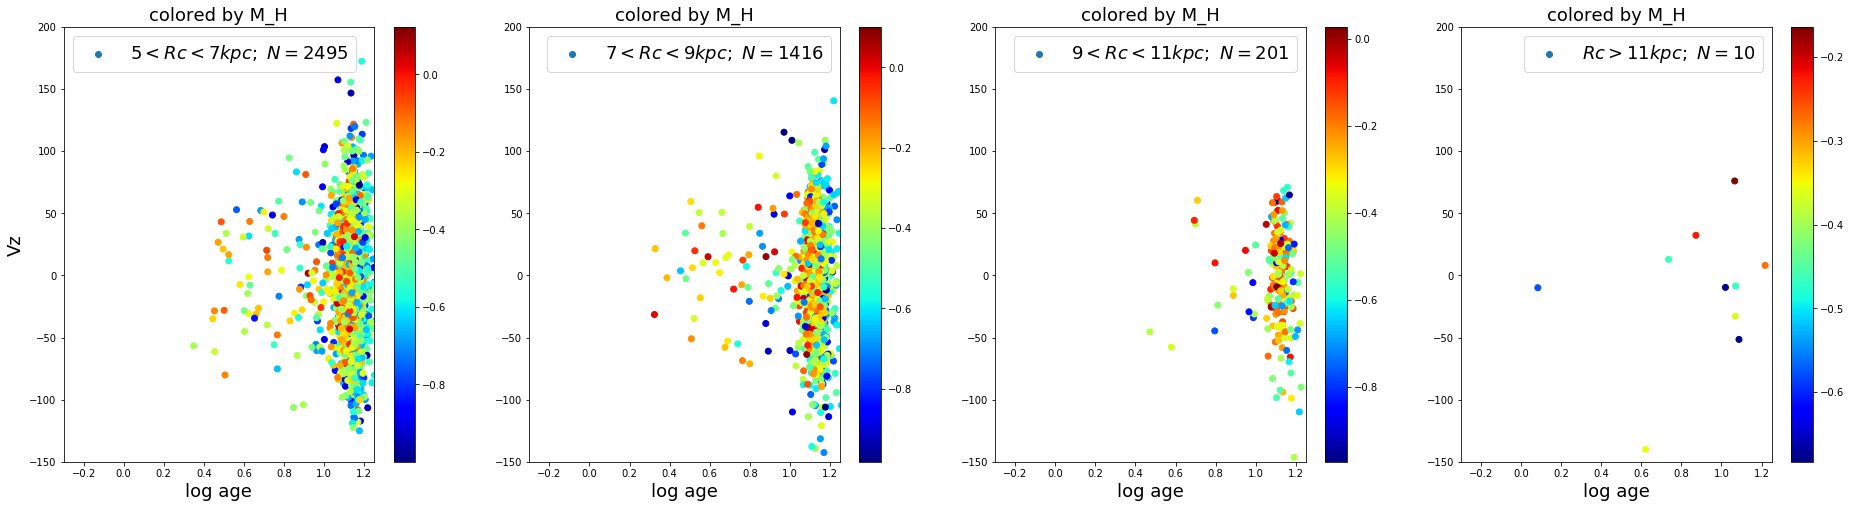

In [27]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (32, 8))

im1 = ax1.scatter(logAge1, vz_1, c=mh1, cmap='jet', label=r'$5 < Rc < 7 kpc; \ N=2495$')
im2 = ax2.scatter(logAge2, vz_2, c=mh2,  cmap='jet', label=r'$7 < Rc < 9 kpc; \ N=1416$')
im3 = ax3.scatter(logAge3, vz_3, c=mh3, cmap='jet', label=r'$9 < Rc < 11 kpc; \ N=201$')
im4 = ax4.scatter(logAge4, vz_4, c=mh4, cmap='jet', label=r'$Rc > 11 kpc; \ N=10$')

ax1.legend(fontsize=18)
ax2.legend(fontsize=18)
ax3.legend(fontsize=18)
ax4.legend(fontsize=18)

ax1.set_xlabel('log age', fontsize=18)
ax2.set_xlabel('log age', fontsize=18)
ax3.set_xlabel('log age', fontsize=18)
ax4.set_xlabel('log age', fontsize=18)

ax1.set_ylabel('Vz', fontsize=18)

fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
fig.colorbar(im3, ax=ax3)
fig.colorbar(im4, ax=ax4)

ax1.set_title('colored by M_H', fontsize=18)
ax2.set_title('colored by M_H', fontsize=18)
ax3.set_title('colored by M_H', fontsize=18)
ax4.set_title('colored by M_H', fontsize=18)

ax1.set_ylim(-150, 200)
ax2.set_ylim(-150, 200)
ax3.set_ylim(-150, 200)
ax4.set_ylim(-150, 200)

ax1.set_xlim(-0.3, 1.25)
ax2.set_xlim(-0.3, 1.25)
ax3.set_xlim(-0.3, 1.25)
ax4.set_xlim(-0.3, 1.25)

plt.savefig('../HighAlpha/age_vs_vz.png')

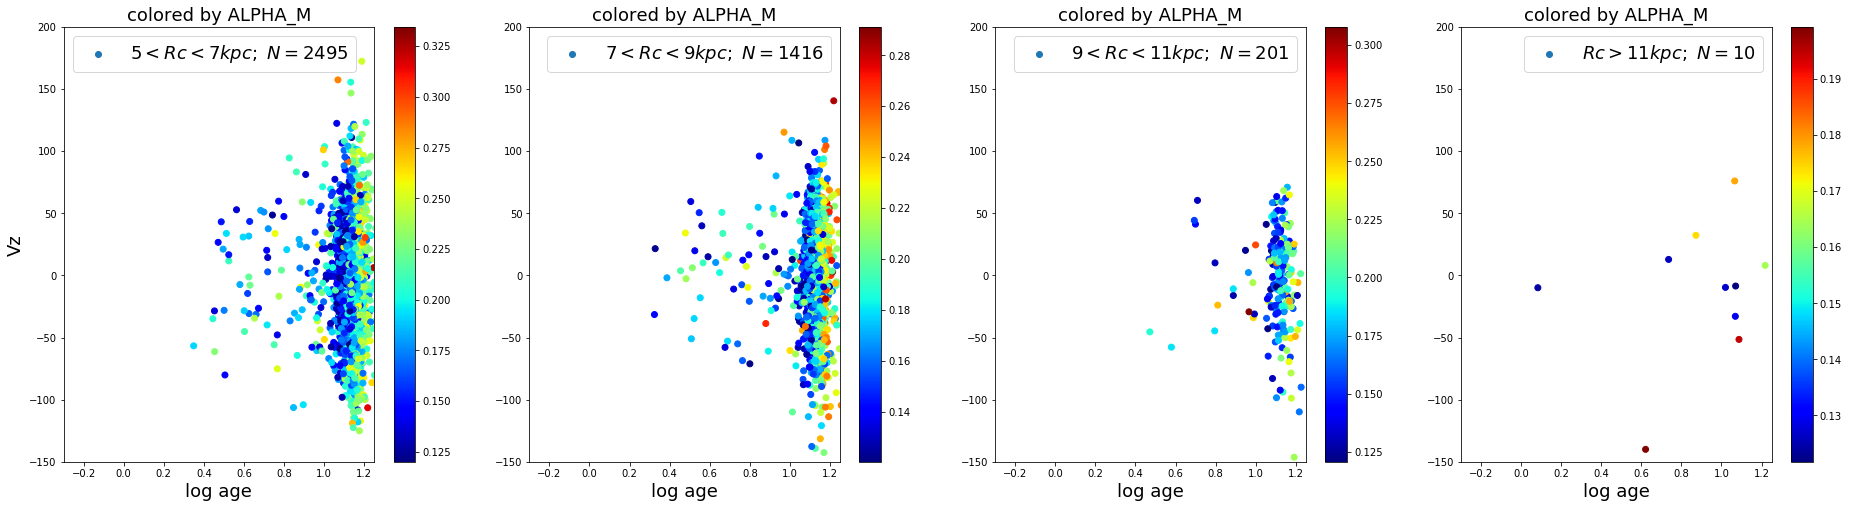

In [28]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (32, 8))

im1 = ax1.scatter(logAge1, vz_1, c=alpha1, cmap='jet', label=r'$5 < Rc < 7 kpc; \ N=2495$')
im2 = ax2.scatter(logAge2, vz_2, c=alpha2,  cmap='jet', label=r'$7 < Rc < 9 kpc; \ N=1416$')
im3 = ax3.scatter(logAge3, vz_3, c=alpha3, cmap='jet', label=r'$9 < Rc < 11 kpc; \ N=201$')
im4 = ax4.scatter(logAge4, vz_4, c=alpha4, cmap='jet', label=r'$Rc > 11 kpc; \ N=10$')

ax1.legend(fontsize=18)
ax2.legend(fontsize=18)
ax3.legend(fontsize=18)
ax4.legend(fontsize=18)

ax1.set_xlabel('log age', fontsize=18)
ax2.set_xlabel('log age', fontsize=18)
ax3.set_xlabel('log age', fontsize=18)
ax4.set_xlabel('log age', fontsize=18)

ax1.set_ylabel('Vz', fontsize=18)

fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
fig.colorbar(im3, ax=ax3)
fig.colorbar(im4, ax=ax4)

ax1.set_title('colored by ALPHA_M', fontsize=18)
ax2.set_title('colored by ALPHA_M', fontsize=18)
ax3.set_title('colored by ALPHA_M', fontsize=18)
ax4.set_title('colored by ALPHA_M', fontsize=18)

ax1.set_ylim(-150, 200)
ax2.set_ylim(-150, 200)
ax3.set_ylim(-150, 200)
ax4.set_ylim(-150, 200)

ax1.set_xlim(-0.3, 1.25)
ax2.set_xlim(-0.3, 1.25)
ax3.set_xlim(-0.3, 1.25)
ax4.set_xlim(-0.3, 1.25)

plt.savefig('../HighAlpha/age_vs_vz_coloredbyAlphaM.png')

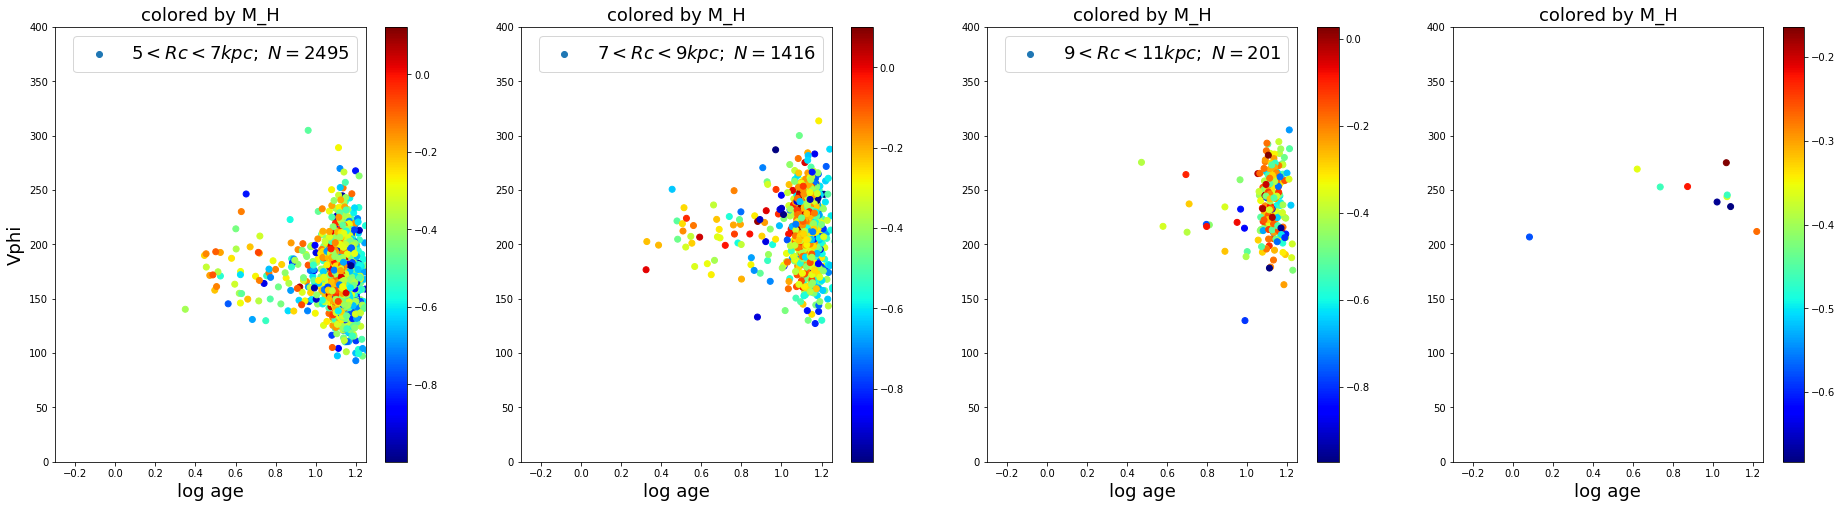

In [29]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (32, 8))

im1 = ax1.scatter(logAge1, vphi_1, c=mh1, cmap='jet', label=r'$5 < Rc < 7 kpc; \ N=2495$')
im2 = ax2.scatter(logAge2, vphi_2, c=mh2,  cmap='jet', label=r'$7 < Rc < 9 kpc; \ N=1416$')
im3 = ax3.scatter(logAge3, vphi_3, c=mh3, cmap='jet', label=r'$9 < Rc < 11 kpc; \ N=201$')
im4 = ax4.scatter(logAge4, vphi_4, c=mh4, cmap='jet', label=r'$Rc > 11 kpc; \ N=10$')

ax1.legend(fontsize=18)
ax2.legend(fontsize=18)
ax3.legend(fontsize=18)
ax3.legend(fontsize=18)

ax1.set_xlabel('log age', fontsize=18)
ax2.set_xlabel('log age', fontsize=18)
ax3.set_xlabel('log age', fontsize=18)
ax4.set_xlabel('log age', fontsize=18)

ax1.set_ylabel('Vphi', fontsize=18)

fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
fig.colorbar(im3, ax=ax3)
fig.colorbar(im4, ax=ax4)

ax1.set_title('colored by M_H', fontsize=18)
ax2.set_title('colored by M_H', fontsize=18)
ax3.set_title('colored by M_H', fontsize=18)
ax4.set_title('colored by M_H', fontsize=18)

ax1.set_ylim(0, 400)
ax2.set_ylim(0, 400)
ax3.set_ylim(0, 400)
ax4.set_ylim(0, 400)

ax1.set_xlim(-0.3, 1.25)
ax2.set_xlim(-0.3, 1.25)
ax3.set_xlim(-0.3, 1.25)
ax4.set_xlim(-0.3, 1.25)

plt.savefig('../HighAlpha/age_vs_vphi.png')

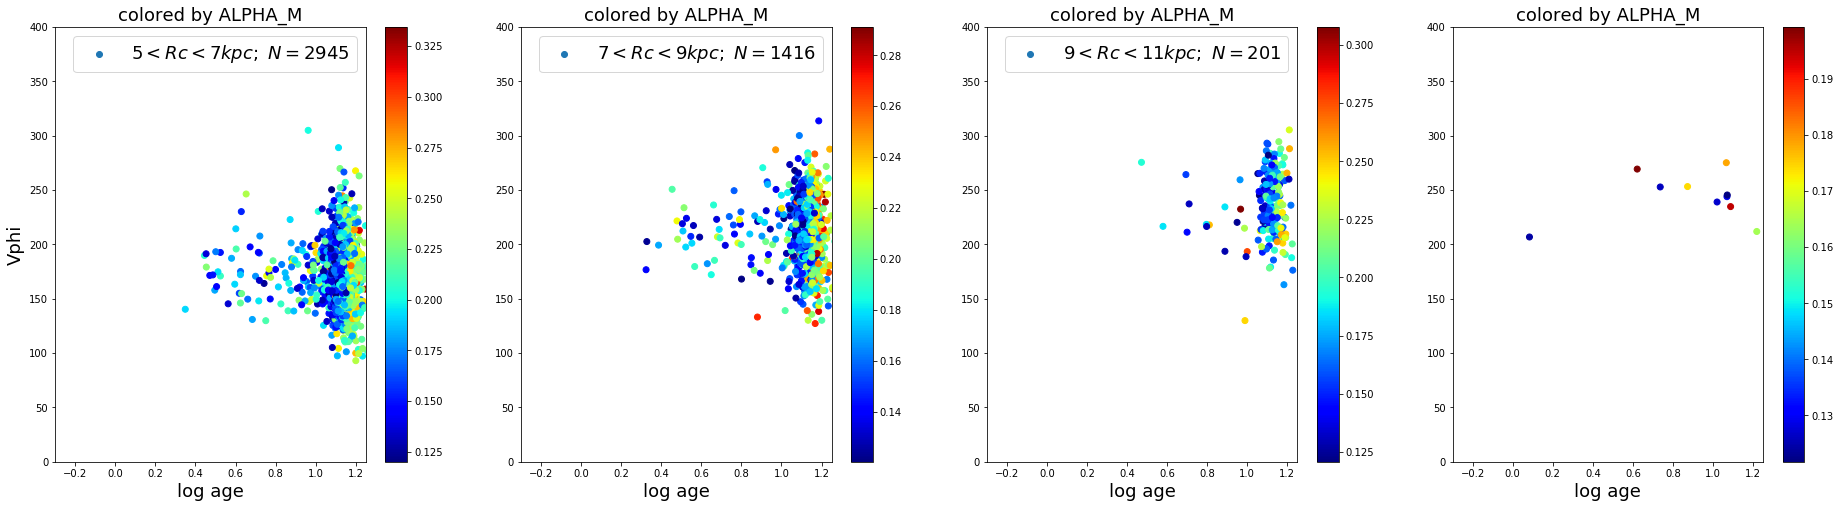

In [30]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (32, 8))

im1 = ax1.scatter(logAge1, vphi_1, c=alpha1, cmap='jet', label=r'$5 < Rc < 7 kpc; \ N=2945$')
im2 = ax2.scatter(logAge2, vphi_2, c=alpha2,  cmap='jet', label=r'$7 < Rc < 9 kpc; \ N=1416$')
im3 = ax3.scatter(logAge3, vphi_3, c=alpha3, cmap='jet', label=r'$9 < Rc < 11 kpc; \ N=201$')
im4 = ax4.scatter(logAge4, vphi_4, c=alpha4, cmap='jet', label=r'$Rc > 11 kpc; \ N=10$')

ax1.legend(fontsize=18)
ax2.legend(fontsize=18)
ax3.legend(fontsize=18)
ax3.legend(fontsize=18)

ax1.set_xlabel('log age', fontsize=18)
ax2.set_xlabel('log age', fontsize=18)
ax3.set_xlabel('log age', fontsize=18)
ax4.set_xlabel('log age', fontsize=18)

ax1.set_ylabel('Vphi', fontsize=18)

fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
fig.colorbar(im3, ax=ax3)
fig.colorbar(im4, ax=ax4)

ax1.set_title('colored by ALPHA_M', fontsize=18)
ax2.set_title('colored by ALPHA_M', fontsize=18)
ax3.set_title('colored by ALPHA_M', fontsize=18)
ax4.set_title('colored by ALPHA_M', fontsize=18)

ax1.set_ylim(0, 400)
ax2.set_ylim(0, 400)
ax3.set_ylim(0, 400)
ax4.set_ylim(0, 400)

ax1.set_xlim(-0.3, 1.25)
ax2.set_xlim(-0.3, 1.25)
ax3.set_xlim(-0.3, 1.25)
ax4.set_xlim(-0.3, 1.25)

plt.savefig('../HighAlpha/age_vs_vphi_coloredbyAlphaM.png')

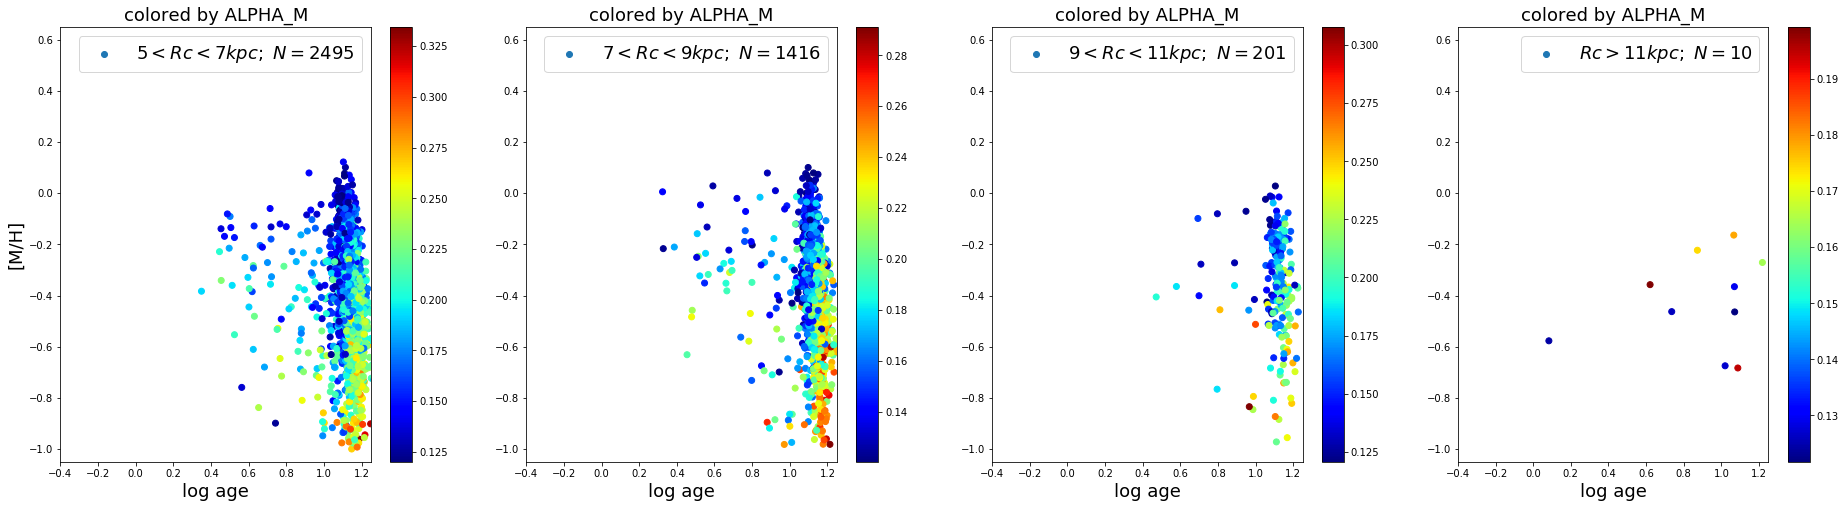

In [31]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (32, 8))

im1 = ax1.scatter(logAge1, mh1, c=alpha1, cmap='jet', label=r'$5 < Rc < 7 kpc; \ N=2495$')
im2 = ax2.scatter(logAge2, mh2, c=alpha2,  cmap='jet', label=r'$7 < Rc < 9 kpc; \ N=1416$')
im3 = ax3.scatter(logAge3, mh3, c=alpha3, cmap='jet', label=r'$9 < Rc < 11 kpc; \ N=201$')
im4 = ax4.scatter(logAge4, mh4, c=alpha4, cmap='jet', label=r'$Rc > 11 kpc; \ N=10$')

ax1.legend(fontsize=18)
ax2.legend(fontsize=18)
ax3.legend(fontsize=18)
ax4.legend(fontsize=18)

ax1.set_xlabel('log age', fontsize=18)
ax2.set_xlabel('log age', fontsize=18)
ax3.set_xlabel('log age', fontsize=18)
ax4.set_xlabel('log age', fontsize=18)

ax1.set_ylabel('[M/H]', fontsize=18)

fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
fig.colorbar(im3, ax=ax3)
fig.colorbar(im4, ax=ax4)

ax1.set_title('colored by ALPHA_M', fontsize=18)
ax2.set_title('colored by ALPHA_M', fontsize=18)
ax3.set_title('colored by ALPHA_M', fontsize=18)
ax4.set_title('colored by ALPHA_M', fontsize=18)

ax1.set_ylim(-1.05, 0.65)
ax2.set_ylim(-1.05, 0.65)
ax3.set_ylim(-1.05, 0.65)
ax4.set_ylim(-1.05, 0.65)

ax1.set_xlim(-0.4, 1.25)
ax2.set_xlim(-0.4, 1.25)
ax3.set_xlim(-0.4, 1.25)
ax4.set_xlim(-0.4, 1.25)

plt.savefig('../HighAlpha/logage_vs_feh.png')

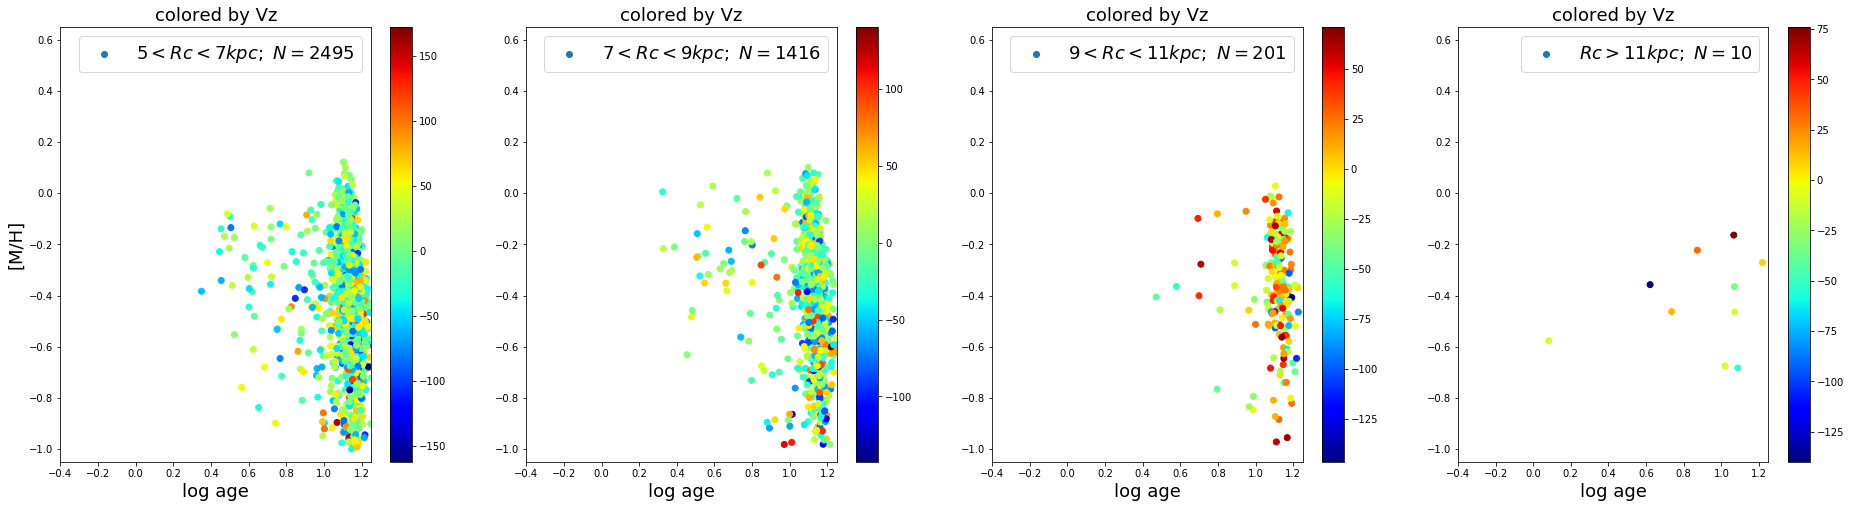

In [32]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (32, 8))

im1 = ax1.scatter(logAge1, mh1, c=vz_1, cmap='jet', label=r'$5 < Rc < 7 kpc; \ N=2495$')
im2 = ax2.scatter(logAge2, mh2, c=vz_2,  cmap='jet', label=r'$7 < Rc < 9 kpc; \ N=1416$')
im3 = ax3.scatter(logAge3, mh3, c=vz_3, cmap='jet', label=r'$9 < Rc < 11 kpc; \ N=201$')
im4 = ax4.scatter(logAge4, mh4, c=vz_4, cmap='jet', label=r'$Rc > 11 kpc; \ N=10$')

ax1.legend(fontsize=18)
ax2.legend(fontsize=18)
ax3.legend(fontsize=18)
ax4.legend(fontsize=18)

ax1.set_xlabel('log age', fontsize=18)
ax2.set_xlabel('log age', fontsize=18)
ax3.set_xlabel('log age', fontsize=18)
ax4.set_xlabel('log age', fontsize=18)

ax1.set_ylabel('[M/H]', fontsize=18)

fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
fig.colorbar(im3, ax=ax3)
fig.colorbar(im4, ax=ax4)

ax1.set_title('colored by Vz', fontsize=18)
ax2.set_title('colored by Vz', fontsize=18)
ax3.set_title('colored by Vz', fontsize=18)
ax4.set_title('colored by Vz', fontsize=18)

ax1.set_ylim(-1.05, 0.65)
ax2.set_ylim(-1.05, 0.65)
ax3.set_ylim(-1.05, 0.65)
ax4.set_ylim(-1.05, 0.65)

ax1.set_xlim(-0.4, 1.25)
ax2.set_xlim(-0.4, 1.25)
ax3.set_xlim(-0.4, 1.25)
ax4.set_xlim(-0.4, 1.25)

plt.savefig('../HighAlpha/logage_vs_feh_coloredbyVz.png')

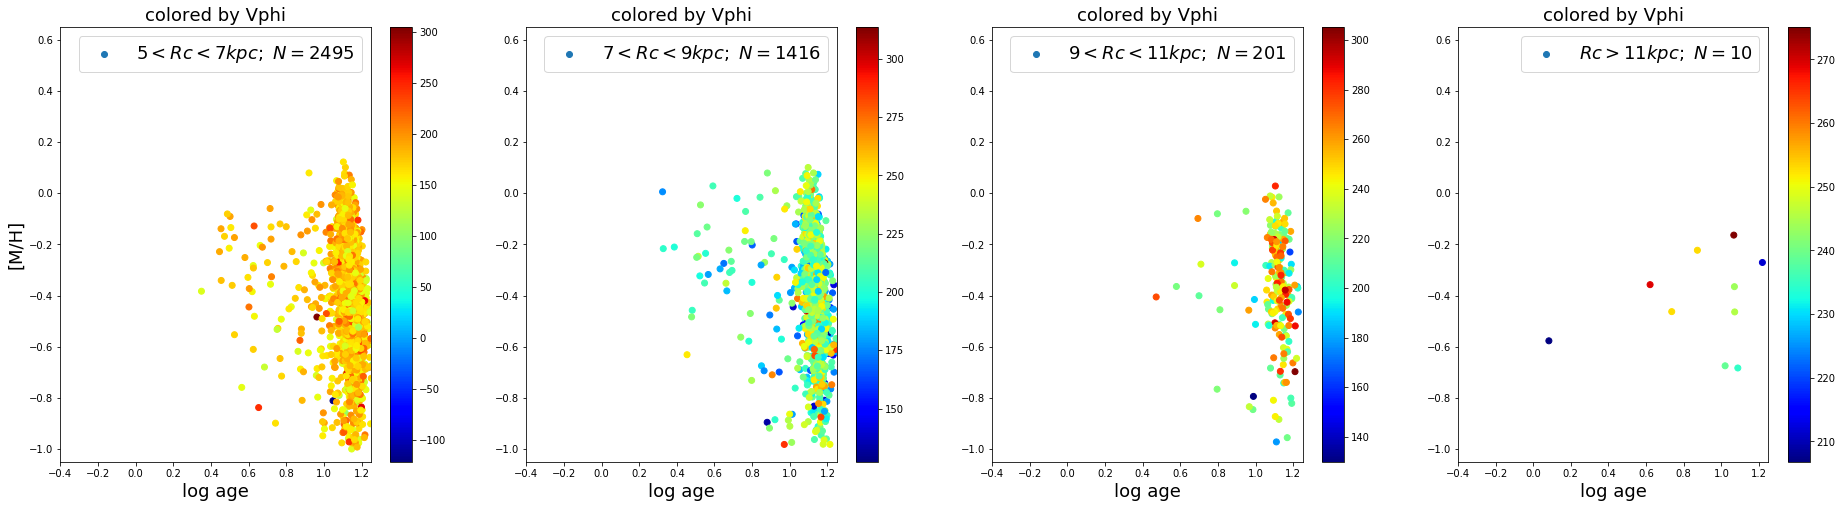

In [33]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (32, 8))

im1 = ax1.scatter(logAge1, mh1, c=vphi_1, cmap='jet', label=r'$5 < Rc < 7 kpc; \ N=2495$')
im2 = ax2.scatter(logAge2, mh2, c=vphi_2,  cmap='jet', label=r'$7 < Rc < 9 kpc; \ N=1416$')
im3 = ax3.scatter(logAge3, mh3, c=vphi_3, cmap='jet', label=r'$9 < Rc < 11 kpc; \ N=201$')
im4 = ax4.scatter(logAge4, mh4, c=vphi_4, cmap='jet', label=r'$Rc > 11 kpc; \ N=10$')

ax1.legend(fontsize=18)
ax2.legend(fontsize=18)
ax3.legend(fontsize=18)
ax4.legend(fontsize=18)

ax1.set_xlabel('log age', fontsize=18)
ax2.set_xlabel('log age', fontsize=18)
ax3.set_xlabel('log age', fontsize=18)
ax4.set_xlabel('log age', fontsize=18)

ax1.set_ylabel('[M/H]', fontsize=18)

fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
fig.colorbar(im3, ax=ax3)
fig.colorbar(im4, ax=ax4)

ax1.set_title('colored by Vphi', fontsize=18)
ax2.set_title('colored by Vphi', fontsize=18)
ax3.set_title('colored by Vphi', fontsize=18)
ax4.set_title('colored by Vphi', fontsize=18)

ax1.set_ylim(-1.05, 0.65)
ax2.set_ylim(-1.05, 0.65)
ax3.set_ylim(-1.05, 0.65)
ax4.set_ylim(-1.05, 0.65)

ax1.set_xlim(-0.4, 1.25)
ax2.set_xlim(-0.4, 1.25)
ax3.set_xlim(-0.4, 1.25)
ax4.set_xlim(-0.4, 1.25)

plt.savefig('../HighAlpha/logage_vs_feh_coloredbyVphi.png')

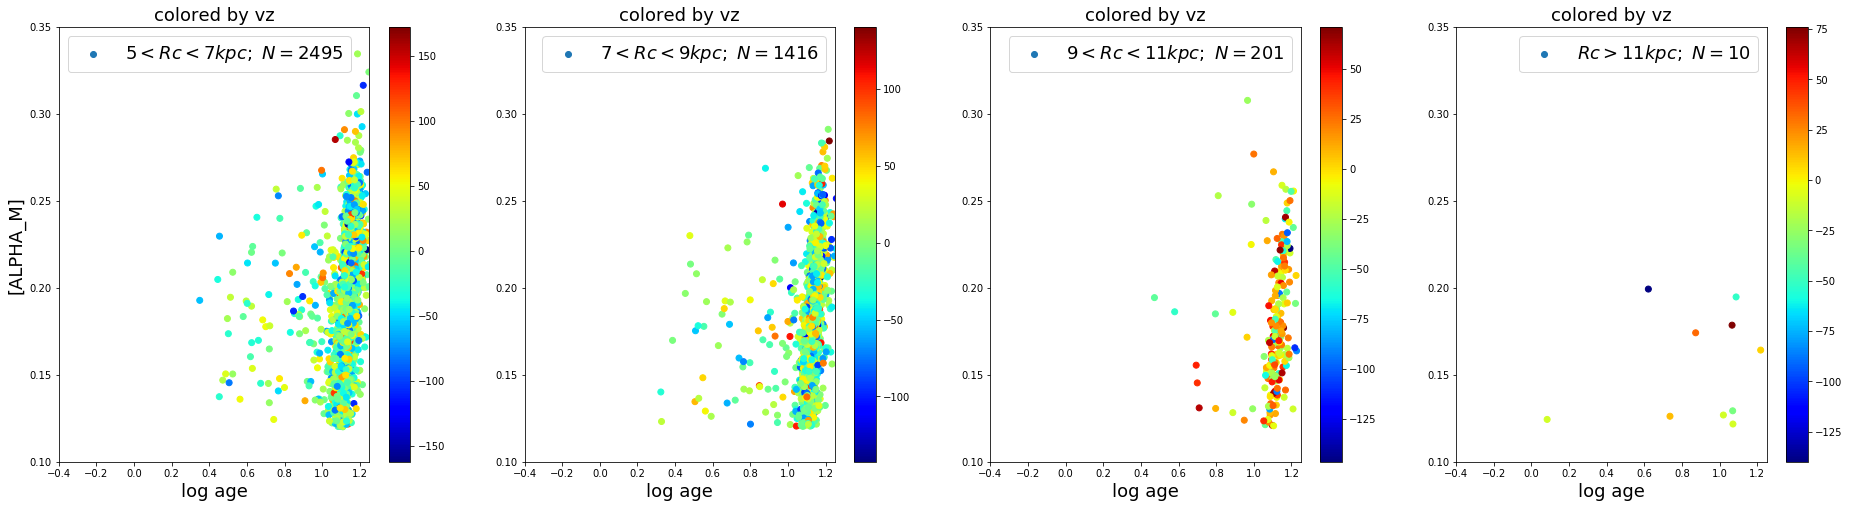

In [34]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (32, 8))

im1 = ax1.scatter(logAge1, alpha1, c=vz_1, cmap='jet', label=r'$5 < Rc < 7 kpc; \ N=2495$')
im2 = ax2.scatter(logAge2, alpha2, c=vz_2,  cmap='jet', label=r'$7 < Rc < 9 kpc; \ N=1416$')
im3 = ax3.scatter(logAge3, alpha3, c=vz_3, cmap='jet', label=r'$9 < Rc < 11 kpc; \ N=201$')
im4 = ax4.scatter(logAge4, alpha4, c=vz_4, cmap='jet', label=r'$Rc > 11 kpc; \ N=10$')

ax1.legend(fontsize=18)
ax2.legend(fontsize=18)
ax3.legend(fontsize=18)
ax4.legend(fontsize=18)

ax1.set_xlabel('log age', fontsize=18)
ax2.set_xlabel('log age', fontsize=18)
ax3.set_xlabel('log age', fontsize=18)
ax4.set_xlabel('log age', fontsize=18)

ax1.set_ylabel('[ALPHA_M]', fontsize=18)

fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
fig.colorbar(im3, ax=ax3)
fig.colorbar(im4, ax=ax4)

ax1.set_title('colored by vz', fontsize=18)
ax2.set_title('colored by vz', fontsize=18)
ax3.set_title('colored by vz', fontsize=18)
ax4.set_title('colored by vz', fontsize=18)

ax1.set_ylim(0.1, 0.35)
ax2.set_ylim(0.1, 0.35)
ax3.set_ylim(0.1, 0.35)
ax4.set_ylim(0.1, 0.35)

ax1.set_xlim(-0.4, 1.25)
ax2.set_xlim(-0.4, 1.25)
ax3.set_xlim(-0.4, 1.25)
ax4.set_xlim(-0.4, 1.25)

plt.savefig('../HighAlpha/logage_vs_alpham_coloredbyVz.png')

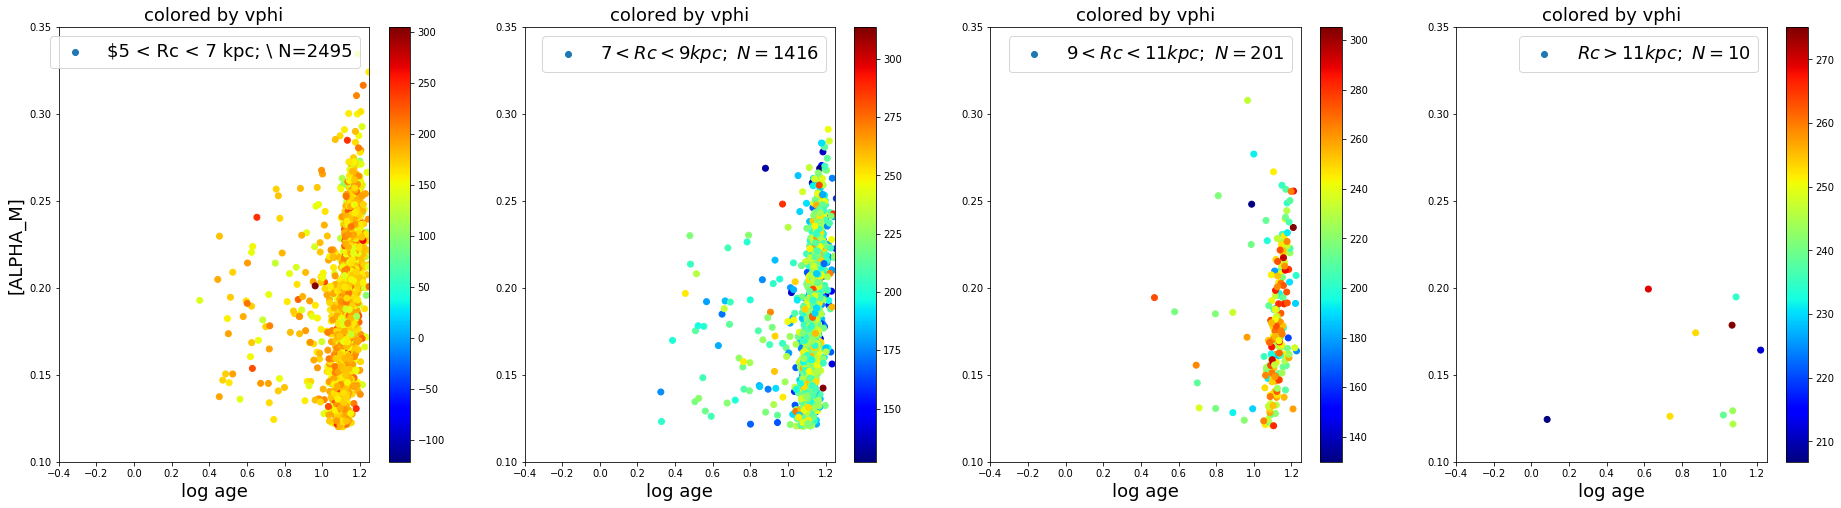

In [35]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (32, 8))

im1 = ax1.scatter(logAge1, alpha1, c=vphi_1, cmap='jet', label=r'$5 < Rc < 7 kpc; \ N=2495')
im2 = ax2.scatter(logAge2, alpha2, c=vphi_2,  cmap='jet', label=r'$7 < Rc < 9 kpc; \ N=1416$')
im3 = ax3.scatter(logAge3, alpha3, c=vphi_3, cmap='jet', label=r'$9 < Rc < 11 kpc; \ N=201$')
im4 = ax4.scatter(logAge4, alpha4, c=vphi_4, cmap='jet', label=r'$Rc > 11 kpc; \ N=10$')

ax1.legend(fontsize=18)
ax2.legend(fontsize=18)
ax3.legend(fontsize=18)
ax4.legend(fontsize=18)

ax1.set_xlabel('log age', fontsize=18)
ax2.set_xlabel('log age', fontsize=18)
ax3.set_xlabel('log age', fontsize=18)
ax4.set_xlabel('log age', fontsize=18)

ax1.set_ylabel('[ALPHA_M]', fontsize=18)

fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
fig.colorbar(im3, ax=ax3)
fig.colorbar(im4, ax=ax4)

ax1.set_title('colored by vphi', fontsize=18)
ax2.set_title('colored by vphi', fontsize=18)
ax3.set_title('colored by vphi', fontsize=18)
ax4.set_title('colored by vphi', fontsize=18)

ax1.set_ylim(0.1, 0.35)
ax2.set_ylim(0.1, 0.35)
ax3.set_ylim(0.1, 0.35)
ax4.set_ylim(0.1, 0.35)

ax1.set_xlim(-0.4, 1.25)
ax2.set_xlim(-0.4, 1.25)
ax3.set_xlim(-0.4, 1.25)
ax4.set_xlim(-0.4, 1.25)

plt.savefig('../HighAlpha/logage_vs_alpham_coloredbyVphi.png')

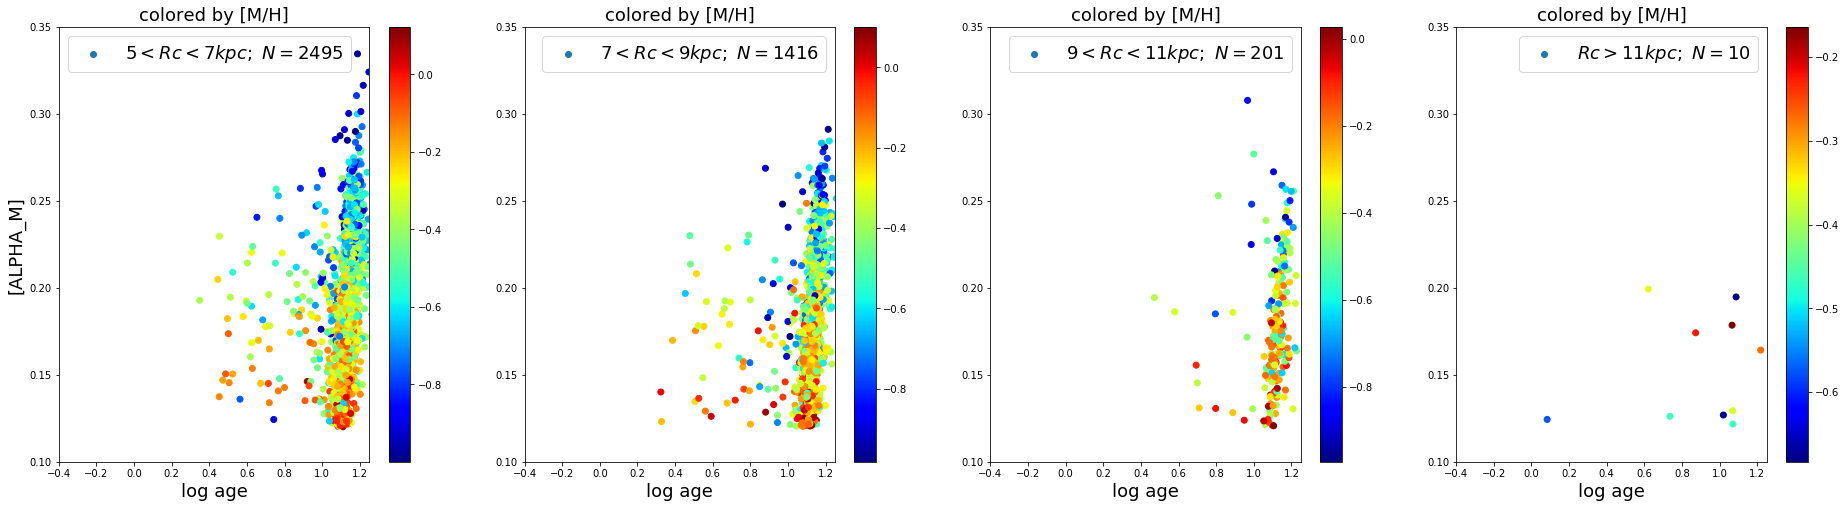

In [36]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (32, 8))

im1 = ax1.scatter(logAge1, alpha1, c=mh1, cmap='jet', label=r'$5 < Rc < 7 kpc; \ N=2495$')
im2 = ax2.scatter(logAge2, alpha2, c=mh2,  cmap='jet', label=r'$7 < Rc < 9 kpc; \ N=1416$')
im3 = ax3.scatter(logAge3, alpha3, c=mh3, cmap='jet', label=r'$9 < Rc < 11 kpc; \ N=201$')
im4 = ax4.scatter(logAge4, alpha4, c=mh4, cmap='jet', label=r'$Rc > 11 kpc; \ N=10$')

ax1.legend(fontsize=18)
ax2.legend(fontsize=18)
ax3.legend(fontsize=18)
ax4.legend(fontsize=18)

ax1.set_xlabel('log age', fontsize=18)
ax2.set_xlabel('log age', fontsize=18)
ax3.set_xlabel('log age', fontsize=18)
ax4.set_xlabel('log age', fontsize=18)

ax1.set_ylabel('[ALPHA_M]', fontsize=18)

fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
fig.colorbar(im3, ax=ax3)
fig.colorbar(im4, ax=ax4)

ax1.set_title('colored by [M/H]', fontsize=18)
ax2.set_title('colored by [M/H]', fontsize=18)
ax3.set_title('colored by [M/H]', fontsize=18)
ax4.set_title('colored by [M/H]', fontsize=18)

ax1.set_ylim(0.1, 0.35)
ax2.set_ylim(0.1, 0.35)
ax3.set_ylim(0.1, 0.35)
ax4.set_ylim(0.1, 0.35)

ax1.set_xlim(-0.4, 1.25)
ax2.set_xlim(-0.4, 1.25)
ax3.set_xlim(-0.4, 1.25)
ax4.set_xlim(-0.4, 1.25)

plt.savefig('../HighAlpha/logage_vs_alpham_coloredbyMH.png')